# 数据介绍

## 背景
    海伦女士一直使用在线约会网站寻找适合自己的约会对象。尽管约会网站会推荐不同的任选，但她并不是喜欢每一个人。经过一番总结，她发现自己交往过的人可以进行如下分类：
    
- 不喜欢的人
- 魅力一般的人
- 极具魅力的人

    海伦收集约会数据已经有了一段时间，她把这些数据存放在文本文件datingTestSet.txt中，每个样本数据占据一行，总共有1000行。
    
    
    海伦收集的样本数据主要包含以下3种特征：

- 每年获得的飞行常客里程数
- 玩视频游戏所消耗时间百分比
- 每周消费的冰淇淋公升数


## 步骤
- 载入数据-处理
    - 载入数据
    - 数据缺失值处理
    - 数据映射处理

- 数据分析
    - 数据基本信息
    - 数据可视化分析
    
- 数据准备
    - 数据归一化处理
    - 分离特征和标签
    - 训练数据、测试数据分离

- 建模
    - 建立模型
    - 模型训练
    - 模型测试 
    - 模型预测

# 数据载入

In [84]:
import pandas as pd 
import numpy as np 

In [85]:
# 载入数据并查看head() 默认查看前五个
df = pd.read_csv('data/dating.txt',  sep='\t',header = -1) 
df.columns = ['a', 'b', 'c', 'label']
df.head()

,a,b,c,label
0,40920,8.326976,0.953952,largeDoses
1,14488,7.153469,1.673904,smallDoses
2,26052,1.441871,0.805124,didntLike
3,75136,13.147394,0.428964,didntLike
4,38344,1.669788,0.134296,didntLike


In [86]:
# 查看整个数据集的信息
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
a        1000 non-null int64
b        1000 non-null float64
c        1000 non-null float64
label    1000 non-null object
dtypes: float64(2), int64(1), object(1)
memory usage: 31.3+ KB


In [87]:
# 查看各个列的数据信息
df.describe()

,a,b,c
count,1000.000000,1000.000000,1000.000000
mean,33635.421000,6.559961,0.832073
std,21957.006833,4.243618,0.497239
min,0.000000,0.000000,0.001156
25%,13796.000000,2.933963,0.408995
50%,31669.000000,6.595204,0.809420
75%,47716.250000,10.056500,1.272847
max,91273.000000,20.919349,1.695517


In [88]:
# 查看label数据的信息
df.label.value_counts()

didntLike     342
smallDoses    331
largeDoses    327
Name: label, dtype: int64

In [89]:
# 看看label有哪些值
df.label.unique()

array(['largeDoses', 'smallDoses', 'didntLike'], dtype=object)

# 数据可视化

In [90]:
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline

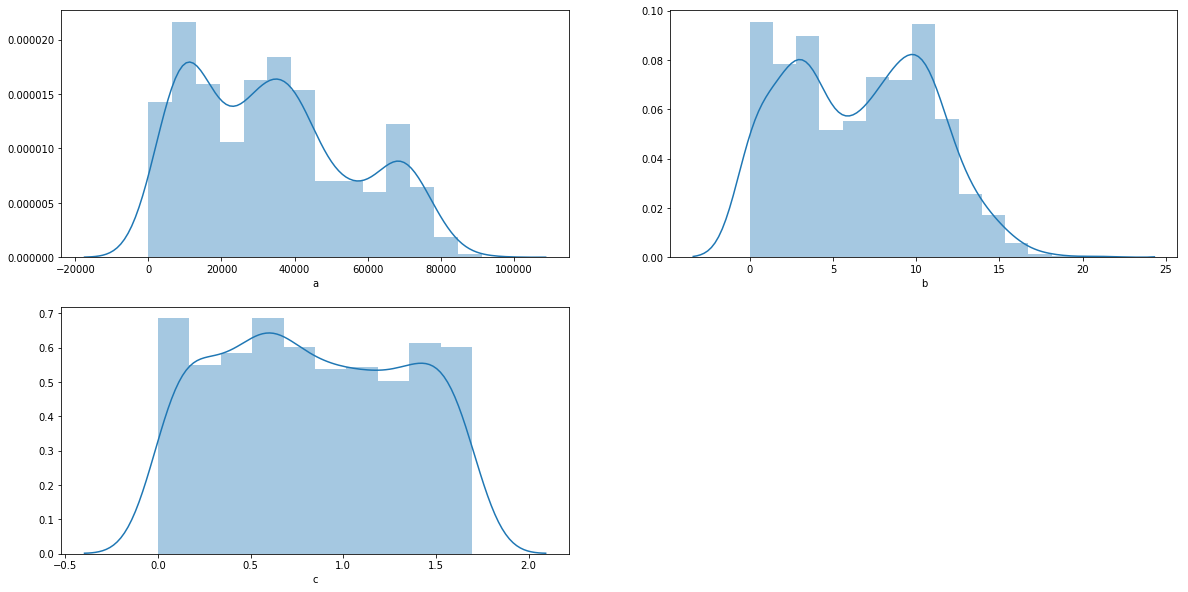

In [91]:
# 查看abc 的分布

plt.figure(figsize = (20, 10))
ax1  = plt.subplot(2,2,1)
ax2 = plt.subplot(2,2,2)
ax3  = plt.subplot(2,2,3)

sns.distplot(df.a, ax = ax1)
sns.distplot(df.b, ax = ax2)
sns.distplot(df.c, ax = ax3)

<Figure size 1440x720 with 0 Axes>

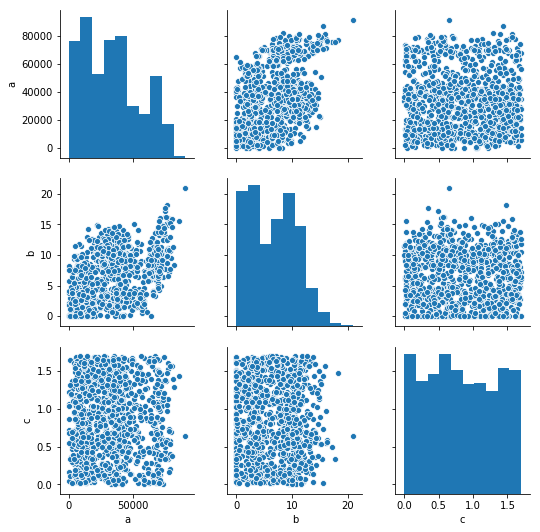

In [58]:
# 查看变量之间的两两关系 
sns.pairplot(df)

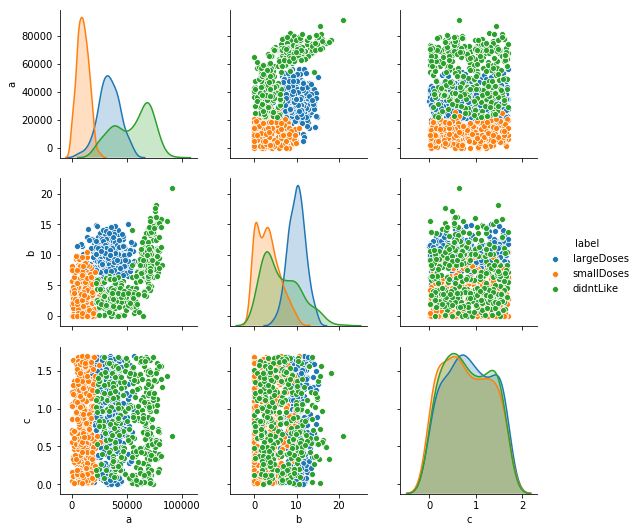

In [57]:
sns.pairplot(df, hue = 'label')

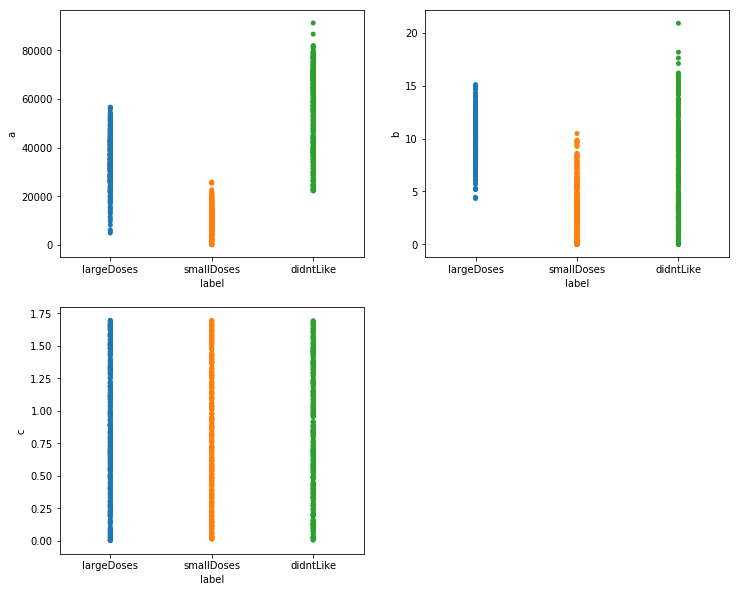

In [60]:
plt.figure(figsize = (12, 10))
ax1 = plt.subplot(2,2,1)
ax2 = plt.subplot(2,2,2)
ax3 = plt.subplot(2,2,3)
sns.stripplot(x="label", y="a", data=df, jitter=False, ax = ax1)
sns.stripplot(x="label", y="b", data=df, jitter=False, ax = ax2)
sns.stripplot(x="label", y="c", data=df, jitter=False, ax = ax3)

# 数据归一化处理

In [92]:
df[['a', 'b', 'c']].astype("float").head() 

,a,b,c
0,40920.0,8.326976,0.953952
1,14488.0,7.153469,1.673904
2,26052.0,1.441871,0.805124
3,75136.0,13.147394,0.428964
4,38344.0,1.669788,0.134296


In [102]:
from sklearn.preprocessing import StandardScaler 
df_std = StandardScaler().fit_transform(df[['a', 'b', 'c']].astype("float") )
type(df_std)
df_std = pd.DataFrame(data = df_std)

label = df[['label']]
label_num = label.label.map({'largeDoses':3, 'smallDoses':2, 'didntLike':1})
type(label_num)

pandas.core.series.Series

# 切分数据集

In [111]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_std, label_num, test_size = 0.2)

In [114]:
print('x_train lenght:', len(x_train))
print('x_test lenght:', len(x_test))
print('y_train lenght:', len(y_train))
print('y_test lenght:', len(y_test))

x_train lenght: 800
x_test lenght: 200
y_train lenght: 800
y_test lenght: 200


# 建立模型

## 基本建模测试

In [112]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train) 
score = knn.score(x_test, y_test)
score 

0.95

## 采用网格搜索搜索参数

In [145]:
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier(n_neighbors=4)
param_grid = {'n_neighbors':[i for i in range(3, 11)]}
grid_search = GridSearchCV(knn, param_grid=param_grid, verbose=10, cv = 2)
grid_search.fit(x_train, y_train) 
knn2 = grid_search.best_estimator_

knn2.fit(x_train, y_train) 
score2 = knn2.score(x_test, y_test)
score2 


Fitting 2 folds for each of 8 candidates, totalling 16 fits
[CV] n_neighbors=3 ...................................................
[CV] ........................ n_neighbors=3, score=0.93, total=   0.0s
[CV] n_neighbors=3 ...................................................
[CV] ...................... n_neighbors=3, score=0.9475, total=   0.0s
[CV] n_neighbors=4 ...................................................
[CV] ....................... n_neighbors=4, score=0.945, total=   0.0s
[CV] n_neighbors=4 ...................................................
[CV] ....................... n_neighbors=4, score=0.945, total=   0.0s
[CV] n_neighbors=5 ...................................................
[CV] ....................... n_neighbors=5, score=0.945, total=   0.0s
[CV] n_neighbors=5 ...................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s remaining:    0.0s


[CV] ...................... n_neighbors=5, score=0.9625, total=   0.0s
[CV] n_neighbors=6 ...................................................
[CV] ....................... n_neighbors=6, score=0.945, total=   0.0s
[CV] n_neighbors=6 ...................................................
[CV] ...................... n_neighbors=6, score=0.9625, total=   0.0s
[CV] n_neighbors=7 ...................................................
[CV] ........................ n_neighbors=7, score=0.94, total=   0.0s
[CV] n_neighbors=7 ...................................................
[CV] ...................... n_neighbors=7, score=0.9625, total=   0.0s
[CV] n_neighbors=8 ...................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.4s remaining:    0.0s


[CV] ........................ n_neighbors=8, score=0.95, total=   0.0s
[CV] n_neighbors=8 ...................................................
[CV] ...................... n_neighbors=8, score=0.9625, total=   0.0s
[CV] n_neighbors=9 ...................................................
[CV] ...................... n_neighbors=9, score=0.9375, total=   0.0s
[CV] n_neighbors=9 ...................................................
[CV] ...................... n_neighbors=9, score=0.9625, total=   0.0s
[CV] n_neighbors=10 ..................................................
[CV] ....................... n_neighbors=10, score=0.94, total=   0.0s
[CV] n_neighbors=10 ..................................................
[CV] ....................... n_neighbors=10, score=0.96, total=   0.0s


[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.7s finished


0.96